<ipython-input-1-bb4af237c38c>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


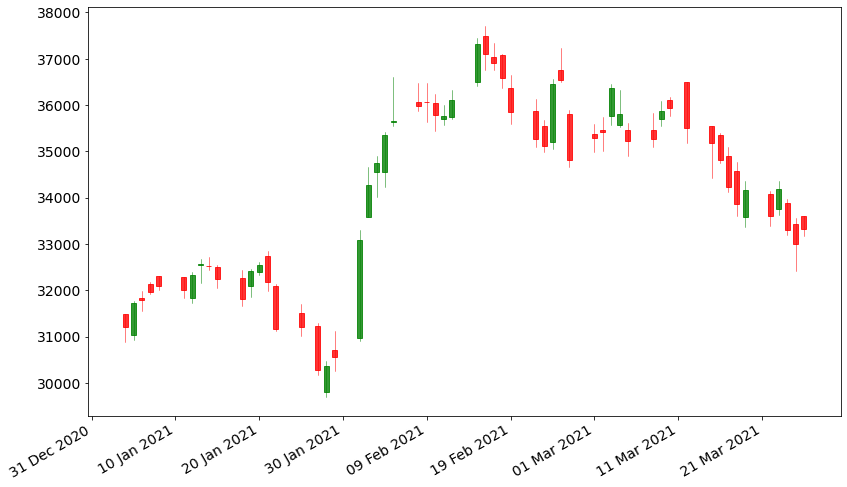

In [1]:
import pandas as pd
import numpy as np
import yfinance
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
name = '^NSEBANK'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2021-01-01", end="2021-03-30")
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
fig, ax = plt.subplots()
candlestick_ohlc(ax,df.values,width=0.6, colorup='green', colordown='red', alpha=0.8)
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()
fig.show()

In [2]:
df = df.drop(columns=['Date'])
to_use_later = df
to_use_later

,Open,High,Low,Close
Date,,,,
2021-01-04,31485.150391,31489.599609,30893.650391,31212.449219
2021-01-05,31041.099609,31767.650391,30935.550781,31722.250000
2021-01-06,31839.949219,31982.300781,31548.150391,31797.900391
2021-01-07,32129.800781,32177.400391,31911.500000,31956.000000
2021-01-08,32298.050781,32298.050781,32002.949219,32084.199219
2021-01-11,32280.300781,32288.449219,31836.949219,31998.900391
2021-01-12,31835.050781,32397.949219,31725.849609,32339.000000
2021-01-13,32546.599609,32683.500000,32148.250000,32574.650391
2021-01-14,32526.699219,32718.949219,32442.349609,32519.750000


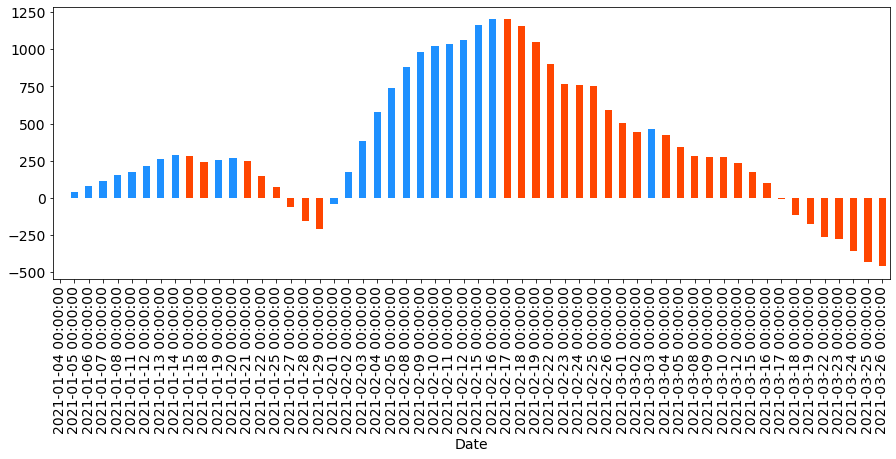

In [3]:
exp1 = df.Close.ewm(span=11, adjust=False).mean()
exp2 = df.Close.ewm(span=22, adjust=False).mean()
macd = exp1-exp2
colors = ['orangered']
for i in range(1,len(macd)):
    if macd[i]>=macd[i-1]:
        colors.append('dodgerblue')
    elif macd[i]<=macd[i-1]:
        colors.append('orangered')
macd.plot(kind='bar', color = colors, figsize=(15,5))

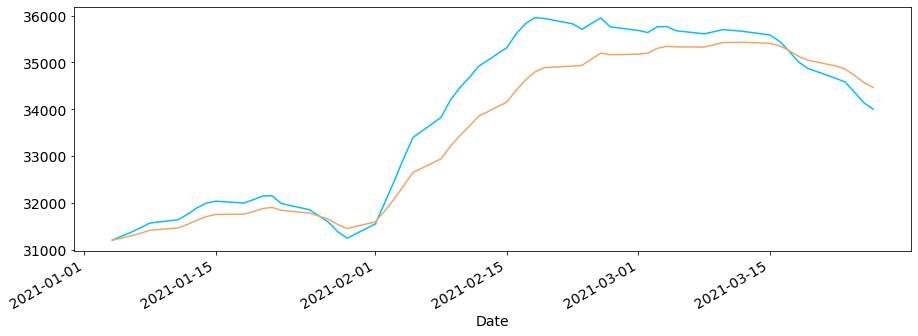

In [4]:
exp1.plot(kind = 'line', figsize = (15,5), color = 'deepskyblue')
exp2.plot(kind = 'line', figsize = (15,5), color = 'sandybrown')

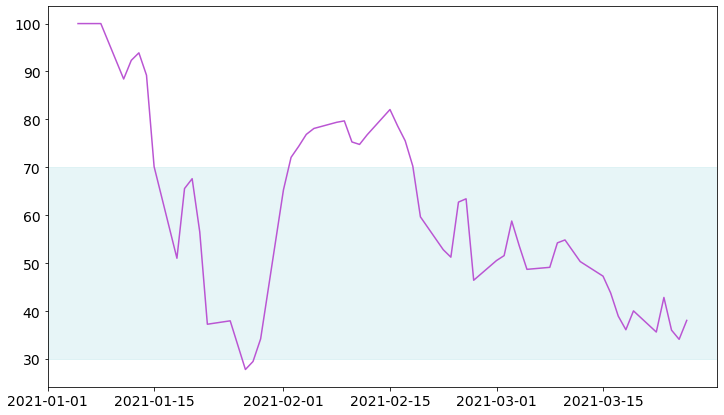

In [5]:
from stockstats import StockDataFrame
stock = StockDataFrame.retype(df)
plt.plot(stock['rsi_11'], color = 'mediumorchid')
plt.axhspan(30, 70, color = 'powderblue', alpha = 0.3)

In [6]:
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2021-01-01", end="2021-03-30")
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [7]:
def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
    return support
def isResistance(df,i):
    resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]
    return resistance

In [8]:
s =  np.mean(df['High'] - df['Low'])

def isFarFromLevel(l, levels):
    return np.sum([abs(l-x) < s  for x in levels]) == 0

level_sup = []
level_res = []
for i in range(2,df.shape[0]-2):
    if isSupport(df,i):
        l = df['Low'][i]
        if isFarFromLevel(l, level_sup):
            level_sup.append((i,l))
    elif isResistance(df,i):
        l = df['High'][i]
        if isFarFromLevel(l, level_res):
            level_res.append((i,l))

fig, ax = plt.subplots()
candlestick_ohlc(ax,df.values,width=0.6, colorup='green', colordown='red', alpha=0.8)
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()
for level in level_sup:
    plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = max(df['Date']), colors = 'green', linewidth = 0.0005*np.mean(level_sup), alpha = 0.2)
for level in level_res:
    plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = max(df['Date']), colors = 'red', linewidth = 0.0005*np.mean(level_res), alpha = 0.2)
fig.show()

In [9]:
import talib
candle_names = talib.get_function_groups()['Pattern Recognition']
op = df['Open']
hi = df['High']
lo = df['Low']
cl = df['Close']
# create columns for each pattern
for candle in candle_names:
    # below is same as;
    # df["CDL3LINESTRIKE"] = talib.CDL3LINESTRIKE(op, hi, lo, cl)
    df[candle] = getattr(talib, candle)(op, hi, lo, cl)

candle_rankings = {
        "CDL3LINESTRIKE_Bull": 1,
        "CDL3LINESTRIKE_Bear": 2,
        "CDL3BLACKCROWS_Bull": 3,
        "CDL3BLACKCROWS_Bear": 3,
        "CDLEVENINGSTAR_Bull": 4,
        "CDLEVENINGSTAR_Bear": 4,
        "CDLTASUKIGAP_Bull": 5,
        "CDLTASUKIGAP_Bear": 5,
        "CDLINVERTEDHAMMER_Bull": 6,
        "CDLINVERTEDHAMMER_Bear": 6,
        "CDLMATCHINGLOW_Bull": 7,
        "CDLMATCHINGLOW_Bear": 7,
        "CDLABANDONEDBABY_Bull": 8,
        "CDLABANDONEDBABY_Bear": 8,
        "CDLBREAKAWAY_Bull": 10,
        "CDLBREAKAWAY_Bear": 10,
        "CDLMORNINGSTAR_Bull": 12,
        "CDLMORNINGSTAR_Bear": 12,
        "CDLPIERCING_Bull": 13,
        "CDLPIERCING_Bear": 13,
        "CDLSTICKSANDWICH_Bull": 14,
        "CDLSTICKSANDWICH_Bear": 14,
        "CDLTHRUSTING_Bull": 15,
        "CDLTHRUSTING_Bear": 15,
        "CDLINNECK_Bull": 17,
        "CDLINNECK_Bear": 17,
        "CDL3INSIDE_Bull": 20,
        "CDL3INSIDE_Bear": 56,
        "CDLHOMINGPIGEON_Bull": 21,
        "CDLHOMINGPIGEON_Bear": 21,
        "CDLDARKCLOUDCOVER_Bull": 22,
        "CDLDARKCLOUDCOVER_Bear": 22,
        "CDLIDENTICAL3CROWS_Bull": 24,
        "CDLIDENTICAL3CROWS_Bear": 24,
        "CDLMORNINGDOJISTAR_Bull": 25,
        "CDLMORNINGDOJISTAR_Bear": 25,
        "CDLXSIDEGAP3METHODS_Bull": 27,
        "CDLXSIDEGAP3METHODS_Bear": 26,
        "CDLTRISTAR_Bull": 28,
        "CDLTRISTAR_Bear": 76,
        "CDLGAPSIDESIDEWHITE_Bull": 46,
        "CDLGAPSIDESIDEWHITE_Bear": 29,
        "CDLEVENINGDOJISTAR_Bull": 30,
        "CDLEVENINGDOJISTAR_Bear": 30,
        "CDL3WHITESOLDIERS_Bull": 32,
        "CDL3WHITESOLDIERS_Bear": 32,
        "CDLONNECK_Bull": 33,
        "CDLONNECK_Bear": 33,
        "CDL3OUTSIDE_Bull": 34,
        "CDL3OUTSIDE_Bear": 39,
        "CDLRICKSHAWMAN_Bull": 35,
        "CDLRICKSHAWMAN_Bear": 35,
        "CDLSEPARATINGLINES_Bull": 36,
        "CDLSEPARATINGLINES_Bear": 40,
        "CDLLONGLEGGEDDOJI_Bull": 37,
        "CDLLONGLEGGEDDOJI_Bear": 37,
        "CDLHARAMI_Bull": 38,
        "CDLHARAMI_Bear": 72,
        "CDLLADDERBOTTOM_Bull": 41,
        "CDLLADDERBOTTOM_Bear": 41,
        "CDLCLOSINGMARUBOZU_Bull": 70,
        "CDLCLOSINGMARUBOZU_Bear": 43,
        "CDLTAKURI_Bull": 47,
        "CDLTAKURI_Bear": 47,
        "CDLDOJISTAR_Bull": 49,
        "CDLDOJISTAR_Bear": 51,
        "CDLHARAMICROSS_Bull": 50,
        "CDLHARAMICROSS_Bear": 80,
        "CDLADVANCEBLOCK_Bull": 54,
        "CDLADVANCEBLOCK_Bear": 54,
        "CDLSHOOTINGSTAR_Bull": 55,
        "CDLSHOOTINGSTAR_Bear": 55,
        "CDLMARUBOZU_Bull": 71,
        "CDLMARUBOZU_Bear": 57,
        "CDLUNIQUE3RIVER_Bull": 60,
        "CDLUNIQUE3RIVER_Bear": 60,
        "CDL2CROWS_Bull": 61,
        "CDL2CROWS_Bear": 61,
        "CDLBELTHOLD_Bull": 62,
        "CDLBELTHOLD_Bear": 63,
        "CDLHAMMER_Bull": 65,
        "CDLHAMMER_Bear": 65,
        "CDLHIGHWAVE_Bull": 67,
        "CDLHIGHWAVE_Bear": 67,
        "CDLSPINNINGTOP_Bull": 69,
        "CDLSPINNINGTOP_Bear": 73,
        "CDLUPSIDEGAP2CROWS_Bull": 74,
        "CDLUPSIDEGAP2CROWS_Bear": 74,
        "CDLGRAVESTONEDOJI_Bull": 77,
        "CDLGRAVESTONEDOJI_Bear": 77,
        "CDLHIKKAKEMOD_Bull": 82,
        "CDLHIKKAKEMOD_Bear": 81,
        "CDLHIKKAKE_Bull": 85,
        "CDLHIKKAKE_Bear": 83,
        "CDLENGULFING_Bull": 84,
        "CDLENGULFING_Bear": 91,
        "CDLMATHOLD_Bull": 86,
        "CDLMATHOLD_Bear": 86,
        "CDLHANGINGMAN_Bull": 87,
        "CDLHANGINGMAN_Bear": 87,
        "CDLRISEFALL3METHODS_Bull": 94,
        "CDLRISEFALL3METHODS_Bear": 89,
        "CDLKICKING_Bull": 96,
        "CDLKICKING_Bear": 102,
        "CDLDRAGONFLYDOJI_Bull": 98,
        "CDLDRAGONFLYDOJI_Bear": 98,
        "CDLCONCEALBABYSWALL_Bull": 101,
        "CDLCONCEALBABYSWALL_Bear": 101,
        "CDL3STARSINSOUTH_Bull": 103,
        "CDL3STARSINSOUTH_Bear": 103,
        "CDLDOJI_Bull": 104,
        "CDLDOJI_Bear": 104,
        "CDLLONGLINE_Bull": 53,
        "CDLLONGLINE_Bear": 53,
        "CDLSHORTLINE_Bull": 85,
        "CDLSHORTLINE_Bear": 66,
        "CDLSTALLEDPATTERN_Bull": 93,
        "CDLSTALLEDPATTERN_Bear": 93,
        "CDLKICKINGBYLENGTH": 96,
        "CDLKICKINGBYLENGTH_Bear": 102
    }

In [10]:
from itertools import compress
import operator
df['candlestick_pattern'] = np.nan
df['candlestick_match_count'] = np.nan
for index, row in df.iterrows():
        # no pattern found
    if len(row[candle_names]) - sum(row[candle_names] == 0) == 0:
        df.loc[index,'candlestick_pattern'] = "NO_PATTERN"
        df.loc[index, 'candlestick_match_count'] = 0
        # single pattern found
    elif len(row[candle_names]) - sum(row[candle_names] == 0) == 1:
            # bull pattern 100 or 200
        if any(row[candle_names].values > 0):
            pattern = list(compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bull'
            df.loc[index, 'candlestick_pattern'] = pattern
            df.loc[index, 'candlestick_match_count'] = 1
            # bear pattern -100 or -200
        else:
            pattern = list(compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bear'
            df.loc[index, 'candlestick_pattern'] = pattern
            df.loc[index, 'candlestick_match_count'] = 1
        # multiple patterns matched -- select best performance
    else:
            # filter out pattern names from bool list of values
        patterns = list(compress(row[candle_names].keys(), row[candle_names].values != 0))
        container = []
        for pattern in patterns:
            if row[pattern] > 0:
                container.append(pattern + '_Bull')
            else:
                container.append(pattern + '_Bear')
        rank_list = [candle_rankings[p] for p in container]
        if len(rank_list) == len(container):
            rank_index_best = rank_list.index(min(rank_list))
            df.loc[index, 'candlestick_pattern'] = container[rank_index_best]
            df.loc[index, 'candlestick_match_count'] = len(container)
    # clean up candle columns
df.drop(candle_names, axis = 1, inplace = True)

<ipython-input-11-385b416a80c0>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


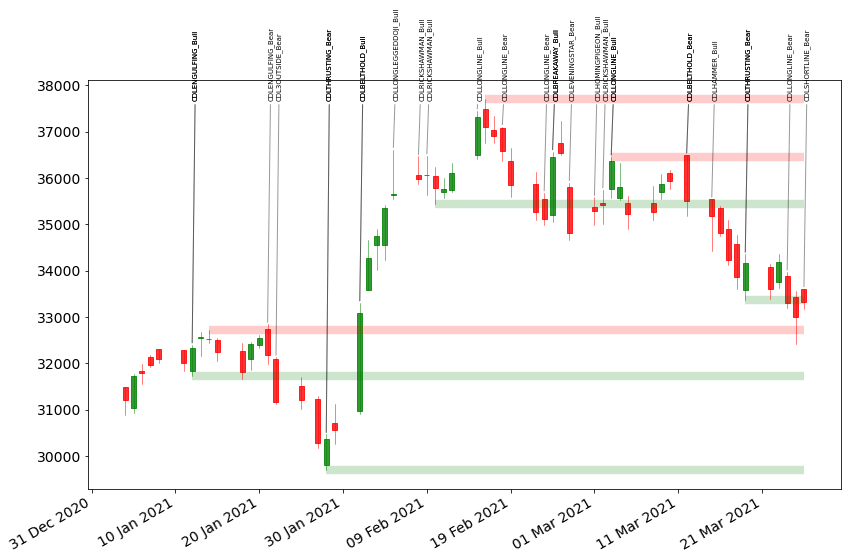

In [11]:
fig, ax = plt.subplots()
candlestick_ohlc(ax,df.values,width=0.6, colorup='green', colordown='red', alpha=0.8)
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()
for level in level_sup:
    plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = max(df['Date']), colors = 'green', linewidth = 0.0005*np.mean(level_sup+level_res), alpha = 0.2)
    price = level[1]
    if df['candlestick_pattern'][level[0]]!='NO_PATTERN':
        ax.annotate(df['candlestick_pattern'][level[0]], xy=(df['Date'][level[0]], df['High'][level[0]]), xytext=(df['Date'][level[0]], max(df['High'])), arrowprops=dict(arrowstyle="-", alpha = 0.4), rotation=90, fontsize = 7)
    for i in range(len(df['Date'])):
        if df['High'][i]>=price and df['Low'][i]<=price and df['candlestick_pattern'][i]!='NO_PATTERN':
            ax.annotate(df['candlestick_pattern'][i], xy=(df['Date'][i], df['High'][i]), xytext=(df['Date'][i], max(df['High'])), arrowprops=dict(arrowstyle="-", alpha = 0.4), rotation = 90, fontsize = 7)
for level in level_res:
    plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = max(df['Date']), colors = 'red', linewidth = 0.0005*np.mean(level_res+level_sup), alpha = 0.2)
    price = level[1]
    if df['candlestick_pattern'][level[0]]!='NO_PATTERN':
        ax.annotate(df['candlestick_pattern'][level[0]], xy=(df['Date'][level[0]], df['High'][level[0]]), xytext=(df['Date'][level[0]], max(df['High'])), arrowprops=dict(arrowstyle="-", alpha = 0.4), rotation = 90, fontsize = 7)
    for i in range(len(df['Date'])):
        if df['High'][i]>=price and df['Low'][i]<=price and df['candlestick_pattern'][i]!='NO_PATTERN':
            ax.annotate(df['candlestick_pattern'][i], xy=(df['Date'][i], df['High'][i]), xytext=(df['Date'][i], max(df['High'])), arrowprops=dict(arrowstyle="-", alpha = 0.4), rotation = 90, fontsize = 7)
fig.show()